In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_rendimento = pd.read_csv("../data/consolidado/df_rendimento.csv")
# Convert the "Data" column to datetime format
df_rendimento['Data'] = pd.to_datetime(df_rendimento['Data'])



In [59]:

df_rendimento['Data'] = pd.to_datetime(df_rendimento['Data'])

# Extract the month and year information
df_rendimento['Month'] = df_rendimento['Data'].dt.month
df_rendimento['Year'] = df_rendimento['Data'].dt.year

# Group by year and month and sum the values
monthly_sum = df_rendimento.groupby(['Year', 'Month']).agg({
    'Entradas': 'sum',
    'Saídas': 'sum',
    'IR': 'sum',
    'IOF': 'sum',
    'Rendimentos': 'sum'
}).reset_index()

# Create a mask to select the last row of each month
mask = df_rendimento.groupby(['Year', 'Month'])['Data'].transform('max') == df_rendimento['Data']

# Use the mask to select the last row of each month
last_rows_of_each_month = df_rendimento[mask]

# Merge the last row information with the monthly sum
result = pd.merge(last_rows_of_each_month, monthly_sum, on=['Year', 'Month'], suffixes=('_last_row', '_monthly_sum'))

# Display the result

result = result.drop(["Entradas_last_row","Saídas_last_row","IR_last_row","IOF_last_row","Rendimentos_last_row",],axis=1)
display(result)

,Data,Saldo Líquido,Month,Year,Entradas_monthly_sum,Saídas_monthly_sum,IR_monthly_sum,IOF_monthly_sum,Rendimentos_monthly_sum
0,2018-07-31,500.00,7,2018,500.00,0.00,0.00,0.00,0.12
1,2018-08-31,2128.07,8,2018,1876.50,256.50,0.00,0.06,10.81
2,2018-09-30,1578.24,9,2018,1042.44,1600.00,0.99,1.08,10.53
3,2018-10-31,3247.39,10,2018,2600.00,944.01,0.11,0.94,18.03
4,2018-11-30,2238.59,11,2018,530.00,1549.18,1.65,0.33,13.62
...,...,...,...,...,...,...,...,...,...
61,2023-08-31,41828.56,8,2023,6301.57,5863.20,47.96,0.00,509.25
62,2023-09-30,42661.94,9,2023,6324.91,5812.69,56.17,0.00,414.34
63,2023-10-31,48114.28,10,2023,6322.37,1219.73,12.94,0.00,451.16
64,2023-11-30,51808.80,11,2023,13378.98,9990.45,119.51,0.00,394.84


#atualizando o results mensal PEDIR EXTRATO DE MOVIMENTAÇAO BANCARIA NO CHAT

In [ ]:
result.to_csv("../data/consolidado/movimentação_bancaria_mensal.csv",index=False,sep=",")

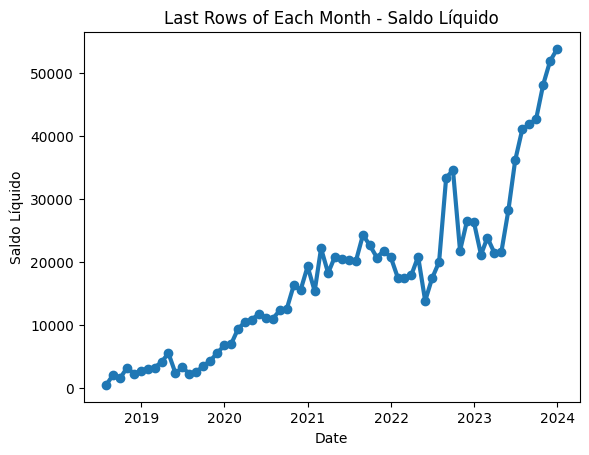

In [13]:
# # Sort the DataFrame by date for better visualization
# last_rows_of_each_month = last_rows_of_each_month.sort_values(by='Data')

# # Create a line chart with thicker lines
# plt.plot(last_rows_of_each_month['Data'], last_rows_of_each_month['Saldo Líquido'], marker='o', linestyle='-', linewidth=3)

# # Set labels and title
# plt.xlabel('Date')
# plt.ylabel('Saldo Líquido')
# plt.title('Last Rows of Each Month - Saldo Líquido')

# # Show the plot
# plt.show()

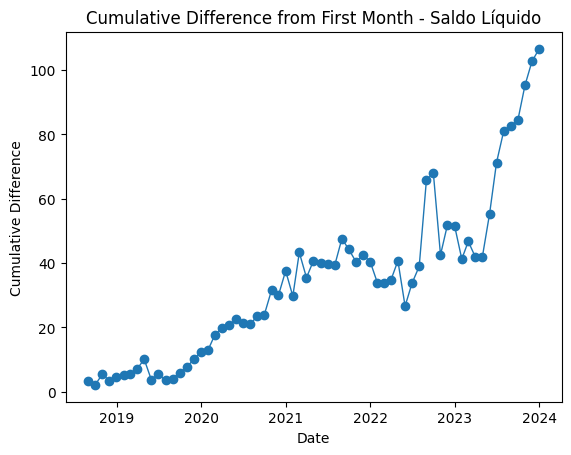

In [23]:
# # Sort the DataFrame by date for better visualization
# last_rows_of_each_month = last_rows_of_each_month.sort_values(by='Data')

# # Calculate the percentage difference from the first month and make it cumulative
# last_rows_of_each_month['Cumulative Difference'] = (last_rows_of_each_month['Saldo Líquido'].pct_change() + 1).cumprod() - 1

# # Create a line chart with thicker lines
# plt.plot(last_rows_of_each_month['Data'], last_rows_of_each_month['Cumulative Difference'] , marker='o', linestyle='-', linewidth=1)

# # Set labels and title
# plt.xlabel('Date')
# plt.ylabel('Cumulative Difference')
# plt.title('Cumulative Difference from First Month - Saldo Líquido')

# # Show the plot
# plt.show()